<a href="https://colab.research.google.com/github/pabloga44/TFG/blob/main/Model_3params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo para 3 parámetros

##Librerías

In [12]:
import sys
import os
import matplotlib.pyplot as plt # for plotting
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!git clone https://github.com/pabloga44/TFG

fatal: destination path 'TFG' already exists and is not an empty directory.


In [15]:
sys.path.insert(0,'/content/TFG')

In [16]:
#Librerias de GitHub
import main as mn
import paint as pt

##Importar datos

In [18]:
InPath = '/content/TFG/data/Input_all.txt'
OutPath = '/content/TFG/data/Output_all.txt'
FrecPath = '/content/TFG/data/Frequencies.txt'

l,x,y = mn.get_data(FrecPath,InPath,OutPath,clean=True)

These params caused NaN, so they were removed: [1.5e-08 2.3e-08 5.2e-01]
These params caused NaN, so they were removed: [2.7e-08 3.7e-08 5.2e-01]
These params caused NaN, so they were removed: [2.70e-08 4.10e-08 1.05e+00]
These params caused NaN, so they were removed: [2.90e-08 4.10e-08 1.05e+00]
These params caused NaN, so they were removed: [3.1e-08 3.7e-08 5.2e-01]


###Ploteamos algunas

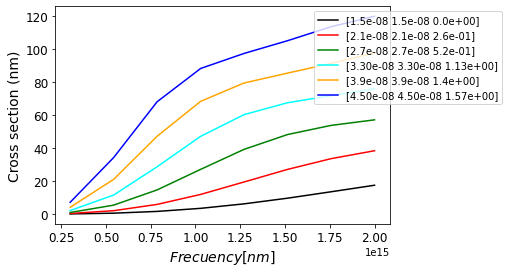

In [19]:
pt.paint_spectra(l,x,y)

###Separación Train Validation Test

In [20]:
x_train,x_validation,x_test,y_train,y_validation,y_test=mn.split_data_3params(x,y)

##Crear y entrenar modelo

In [22]:
model,history= mn.train_model_3params(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='sigmoid',num_epochs=1000)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 150)               600       
_________________________________________________________________
dense_9 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 1208      
Total params: 47,108
Trainable params: 47,108
Non-trainable params: 0
_________________________________________________________________


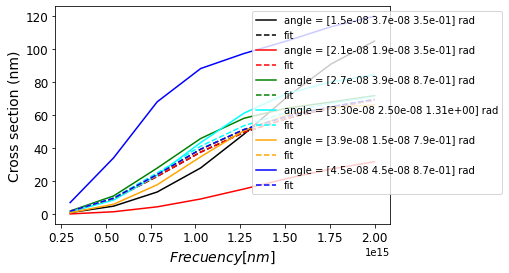

In [23]:
pt.paint_predictions(model,l,x_test,y_test)

##Evaluar modelo

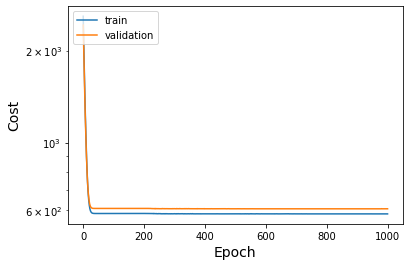

In [25]:
pt.paint_costs(history)